In [23]:
import tensorflow as tf

mnsit = tf.keras.datasets.mnist # 28 * 28 handwritten digits

(x_train,y_train) ,(x_test,y_test) = mnsit.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)



model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 3)
model.summary()

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2681 - accuracy: 0.9212
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1093 - accuracy: 0.9660
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0744 - accuracy: 0.9765
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (32, 784)                 0         
_________________________________________________________________
dense_6 (Dense)              (32, 128)                 100480    
_________________________________________________________________
dense_7 (Dense)              (32, 128)                 16512     
_________________________________________________________________
dense_8 (Dense)              (32, 10)                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________

In [26]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9688
0.09721573442220688 0.9688000082969666


In [12]:
import matplotlib.pyplot as plt

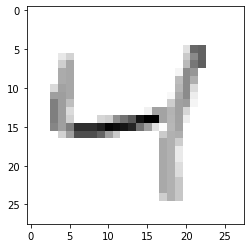

In [19]:
plt.imshow(x_train[2],cmap =plt.cm.binary)
plt.show()

In [27]:
model.save('number.model')

INFO:tensorflow:Assets written to: number.model/assets


In [28]:
new_model = tf.keras.models.load_model("number.model")

In [31]:
pred=new_model.predict([x_test])

In [33]:
# we can predict

import numpy as np
np.argmax(pred[1])

2

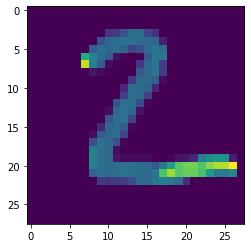

In [35]:
plt.imshow(x_test[1])
plt.show()